In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
allWeeks = pd.read_csv('all_weeks.csv')

## Estimating $R_{0}$ Method 1:  Slope

In [4]:
x = allWeeks['Week']
y = allWeeks['New Cases']
x1 = x[2:17]
y1 = y[2:17]
logy = np.log(y1)

model = sm.OLS(logy, sm.add_constant(x1)).fit()
intercept, m = model.params
print(m)
r = m * x[2:17] + intercept

0.4386945777762124


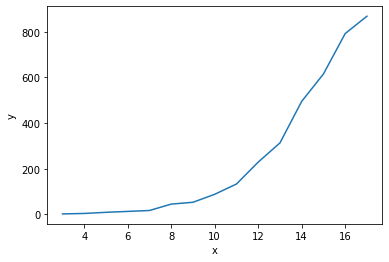

In [5]:
plt.plot(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

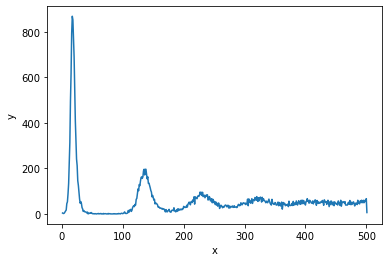

In [6]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

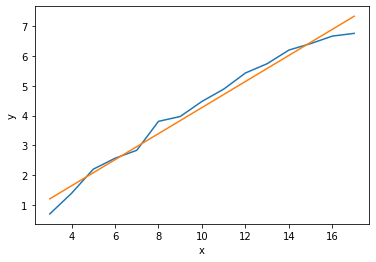

In [7]:
plt.plot(x1, logy)
plt.plot(x1,r)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
gamma = 1/2
death = 1/100

In [9]:
R0 = 1 + (m/(gamma+death))
R0

1.8601854466200243

### Confidence intervals

https://stackoverflow.com/questions/36400419/how-to-calculate-the-99-confidence-interval-for-the-slope-in-a-linear-regressio

In [13]:
lower_m = model.conf_int(alpha=0.05)[0][1]
upper_m = model.conf_int(alpha=0.05)[1][1]
(lower_m,upper_m)

(0.4004392070432511, 0.4769499485091737)

In [14]:
lower_R0 = 1 + (lower_m/(gamma+death))
upper_R0 = 1 + (upper_m/(gamma+death))
(lower_R0,upper_R0)

(1.7851749157710806, 1.9351959774689682)

## Estimating $R_{0}$ Method 2:  Prevalence

In [15]:
p = 7/1000
R0 = 1/(1- (p*((gamma/death)+1)))
R0

1.5552099533437014

### Confidence intervals

In [16]:
upper_p = p + 1.96 * math.sqrt((p * (1 - p)) / 1000)
lower_p = p - 1.96 * math.sqrt((p * (1 - p)) / 1000)
lower_R0 = 1/(1- (lower_p*((gamma/death)+1)))
upper_R0 = 1/(1- (upper_p*((gamma/death)+1)))
(lower_R0,upper_R0)

(1.1030928116663554, 2.6353379999507043)

## Estimating $R_{0}$ Method 4:  Seroprevalence

In [17]:
s = 517/1000
R0 = 1/(1-s)
R0

2.070393374741201

### Confidence intervals

In [18]:
upper_s = s + 1.96 * math.sqrt((s * (1 - s)) / 1000)
lower_s = s - 1.96 * math.sqrt((s * (1 - s)) / 1000)
lower_R0 = 1/(1-lower_s)
upper_R0 = 1/(1-upper_s)
(lower_R0,upper_R0)

(1.945629752143622, 2.2122543130294745)